CSV file loaded successfully.


,Age,Gender,TotalIncome,Utilities,Entertainment,SchoolFees,Shopping,Healthcare
0,24,Male,5000.0,300.0,50.0,200.0,800.0,100.0
1,23,Female,1500.0,100.0,0.0,0.0,0.0,0.0
2,60,Female,3000.0,200.0,100.0,0.0,300.0,150.0
3,35,Male,2000.0,200.0,100.0,150.0,100.0,50.0
4,33,Male,800.0,33.0,20.0,20.0,80.0,50.0


C:\Users\hp\AppData\Local\Temp\ipykernel_1276\2712073127.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_income_ages.index, y=highest_income_ages.values, palette='viridis')


Saved age_income_chart.png


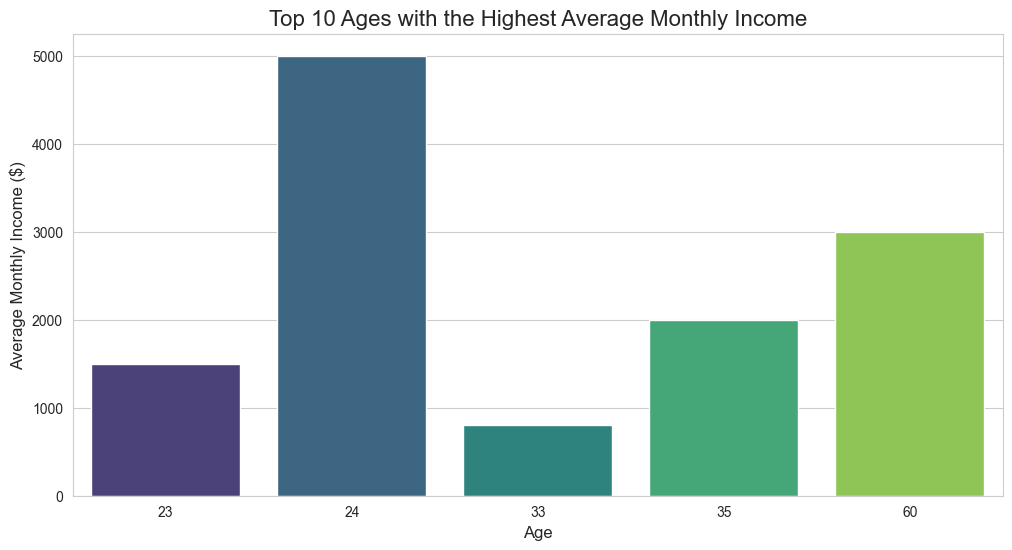

C:\Users\hp\AppData\Local\Temp\ipykernel_1276\2712073127.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='SpendingCategory', y='Amount', hue='Gender', estimator=sum, palette='magma', ci=None)


Saved gender_spending_chart.png


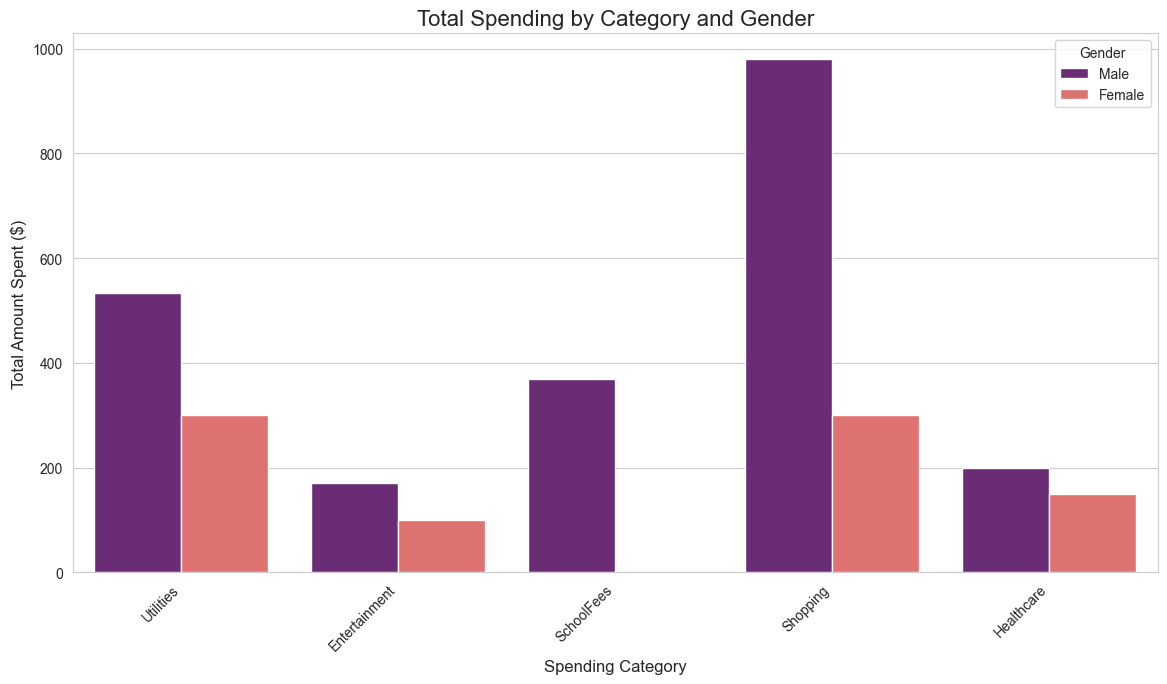

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Load the data from the CSV file
try:
    df = pd.read_csv('survey_data.csv')
    print("CSV file loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: survey_data.csv not found. Please run data_processor.py first.")

# --- Visualization 1: Ages with the Highest Income ---
if 'df' in locals():
    plt.figure(figsize=(12, 6))
    
    # Group by age and get the average income
    highest_income_ages = df.groupby('Age')['TotalIncome'].mean().nlargest(10)
    
    sns.barplot(x=highest_income_ages.index, y=highest_income_ages.values, palette='viridis')
    
    plt.title('Top 10 Ages with the Highest Average Monthly Income', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Average Monthly Income ($)', fontsize=12)
    plt.xticks(rotation=0)
    
    # Save the chart for the presentation
    plt.savefig('age_income_chart.png', dpi=300, bbox_inches='tight')
    print("Saved age_income_chart.png")
    
    plt.show()

# --- Visualization 2: Gender Distribution Across Spending Categories ---
if 'df' in locals():
    # Define expense categories
    expense_cols = ['Utilities', 'Entertainment', 'SchoolFees', 'Shopping', 'Healthcare']
    
    # Melt the dataframe to make it suitable for a grouped bar plot
    df_melted = df.melt(id_vars=['Gender'], value_vars=expense_cols,
                        var_name='SpendingCategory', value_name='Amount')

    plt.figure(figsize=(14, 7))
    
    # Create the grouped bar plot
    sns.barplot(data=df_melted, x='SpendingCategory', y='Amount', hue='Gender', estimator=sum, palette='magma', ci=None)
    
    plt.title('Total Spending by Category and Gender', fontsize=16)
    plt.xlabel('Spending Category', fontsize=12)
    plt.ylabel('Total Amount Spent ($)', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    
    # Save the chart for the presentation
    plt.savefig('gender_spending_chart.png', dpi=300, bbox_inches='tight')
    print("Saved gender_spending_chart.png")
    
    plt.show()